In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Import the csv data**

In [3]:
df = pd.read_csv("LoanApprovalPrediction.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(598, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
print(df.value_counts())

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001003  Male    Yes      1.0         Graduate      No             4583             1508.0             128.0       360.0             1.0             Rural          N              1
LP002305  Female  No       0.0         Graduate      No             4547             0.0                115.0       360.0             1.0             Semiurban      Y              1
LP002347  Male    Yes      0.0         Graduate      No             3246             1417.0             138.0       360.0             1.0             Semiurban      Y              1
LP002345  Male    Yes      0.0         Graduate      No             1025             2773.0             112.0       360.0             1.0             Rural          Y              1
LP002342  Male    Yes      2.0         Graduate      Yes            1600             20000.0   

In [9]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [10]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.duplicated().sum()

0

**Create X and Y vlaues**

In [12]:
X = df.drop(["Loan_ID","Loan_Status"],axis = 1)
y = df["Loan_Status"]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


**Test Train Split**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
145,Female,No,0.0,Graduate,No,10000,1666.0,225.0,360.0,1.0,Rural
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban
374,Female,No,0.0,Graduate,No,6000,0.0,156.0,360.0,1.0,Urban
521,Female,No,0.0,Not Graduate,Yes,18165,0.0,125.0,360.0,1.0,Urban
188,Male,No,0.0,Graduate,No,3858,0.0,76.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
71,Male,No,0.0,Graduate,No,3500,0.0,81.0,300.0,1.0,Semiurban
106,Male,Yes,2.0,Graduate,No,3800,3600.0,216.0,360.0,0.0,Urban
270,Male,Yes,0.0,Graduate,No,3993,3274.0,207.0,360.0,1.0,Semiurban
435,Male,Yes,0.0,Graduate,No,7333,8333.0,175.0,300.0,NaN,Rural


In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((478, 11), (120, 11), (478,), (120,))

**Corelation Graph**

<ipython-input-15-358279ca0807>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='BrBG',fmt=".2g",linewidths=2,annot=True)


<Axes: >

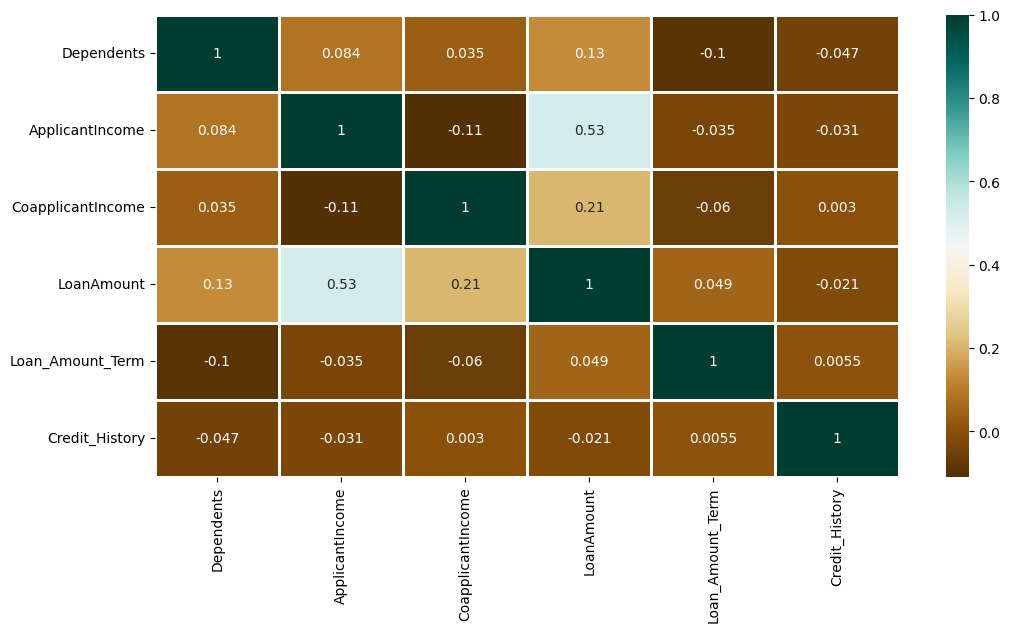

In [15]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG',fmt=".2g",linewidths=2,annot=True)

**Createa a PipeLine**

In [16]:
numerical_col = ['Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
Categorical_col = ['Gender', 'Married','Education','Self_Employed','Property_Area']

In [17]:
from sklearn.impute import SimpleImputer #handle the missing values
from sklearn.preprocessing import OneHotEncoder #encoding
from sklearn.preprocessing import StandardScaler #assign all in single unit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
categ_pipe = Pipeline(steps=[("imputer",SimpleImputer(strategy='most_frequent')),("OneHotEncoder",OneHotEncoder())])
num_pipe = Pipeline(steps=[("imputer",SimpleImputer(strategy="median")),('Scalar',StandardScaler())])

**Column Transfer**

In [19]:
preprocessor = ColumnTransformer([("categ_transform",categ_pipe,Categorical_col),("num_transform",num_pipe,numerical_col)])

In [20]:
import numpy as np
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


**Model Evaluation**

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
dtc = DecisionTreeClassifier()
ss = SVC()
ran = RandomForestClassifier()
knc = KNeighborsClassifier()

In [23]:
algo = [dtc,ss,ran,knc]
algo_name = ['DecisionTreeClassifier','SVC','RandomForestClassifier','kNearestClassifier']

**Prediction and Accuracy Check**

In [24]:
from sklearn.metrics import accuracy_score

for i,j in zip(algo,algo_name):
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  print(j)
  print("Accuarcy Score: ",accuracy_score(y_test,y_pred)*100,'%')
  print('++' *20)

DecisionTreeClassifier
Accuarcy Score:  71.66666666666667 %
++++++++++++++++++++++++++++++++++++++++
SVC
Accuarcy Score:  80.83333333333333 %
++++++++++++++++++++++++++++++++++++++++
RandomForestClassifier
Accuarcy Score:  77.5 %
++++++++++++++++++++++++++++++++++++++++
kNearestClassifier
Accuarcy Score:  77.5 %
++++++++++++++++++++++++++++++++++++++++


In [36]:
results=pd.DataFrame({'Actual Value':y_test,'predicted value':y_pred})
results

,Actual Value,predicted value
110,N,N
287,N,N
563,Y,Y
77,N,N
181,Y,Y
...,...,...
398,Y,Y
433,Y,Y
148,Y,Y
493,Y,Y


In [26]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.67      0.46      0.54        35
           Y       0.80      0.91      0.85        85

    accuracy                           0.78       120
   macro avg       0.73      0.68      0.70       120
weighted avg       0.76      0.78      0.76       120



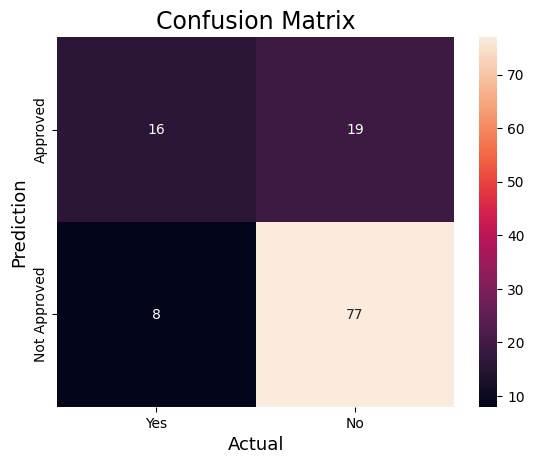

In [27]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Approved','Not Approved'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()